## Sonar Dataset

In [19]:
# import statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
from sklearn import linear_model

## Reading the data

In [20]:
sonar = pd.read_csv("Ex07_Sonar_Regreesion.csv")

## Feature Transformation

In [21]:
sonar.pH.fillna(0.0, inplace = True)

## Scatter Plots

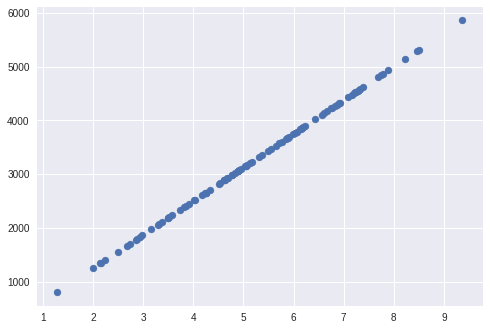

In [22]:
plt.scatter(sonar['EchoTime'], sonar['Distance'])
plt.show()

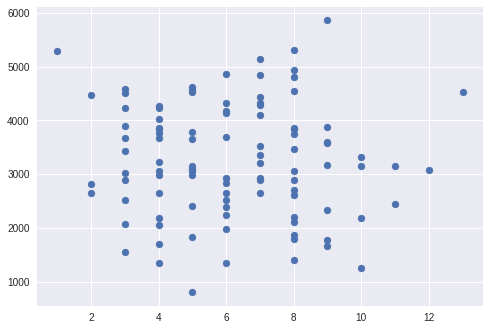

In [23]:
plt.scatter(sonar['WaterTemp'], sonar['Distance'])
plt.show()

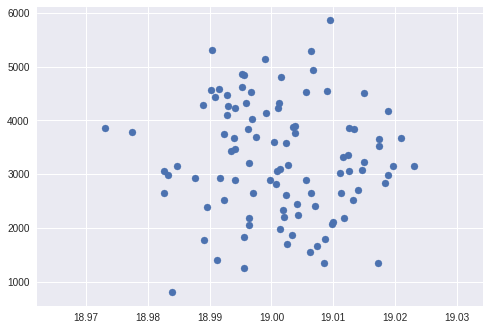

In [24]:
plt.scatter(sonar['Clconcentration'], sonar['Distance'])
plt.show()

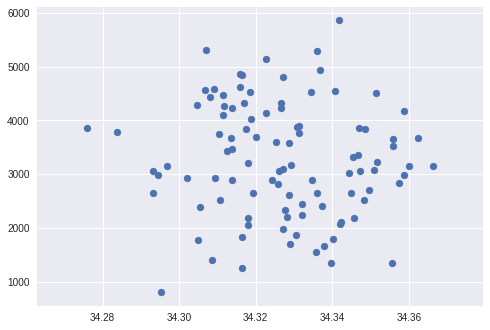

In [25]:
plt.scatter(sonar['Salinity'], sonar['Distance'])
plt.show()

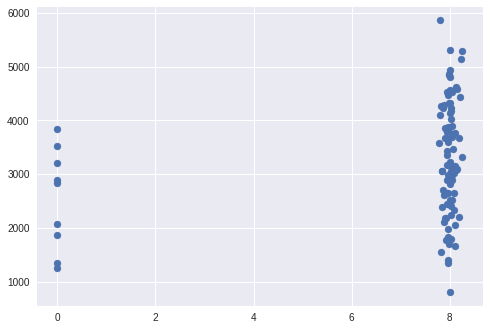

In [26]:
plt.scatter(sonar['pH'], sonar['Distance'])
plt.show()

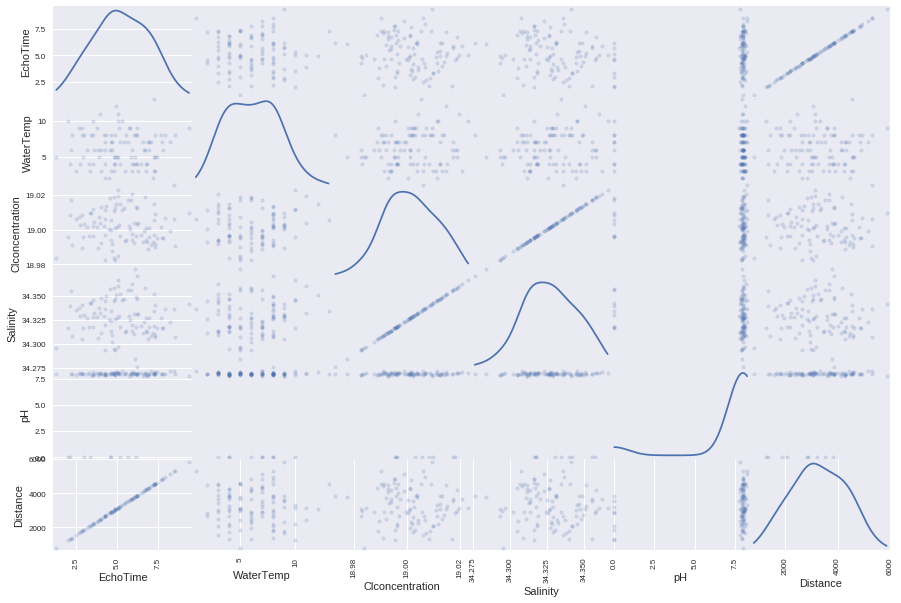

In [27]:
scatter_matrix(sonar, alpha=0.2, figsize=(15, 10), diagonal='kde')
plt.show()

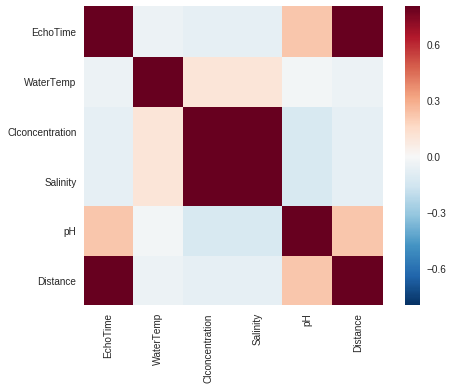

In [28]:
sonar_corr = sonar.corr()
sns.heatmap(sonar_corr, vmax=.8, square=True)
plt.show()

## Training and Test Sets

Training Set

In [29]:
train_sonar = sonar[int(0.40*(len(sonar))):]
x_train = train_sonar.drop('Distance', axis = 1)
y_train = train_sonar[['Distance']]

Test Set

In [30]:
test_sonar = sonar[:int(0.40*(len(sonar))):]
x_test = test_sonar.drop('Distance', axis = 1)
y_test = np.array(test_sonar[['Distance']])

## Normalizing the data

In [58]:
x_train_std = np.array((x_train - x_train.mean())/x_train.std())
y_train_std = np.array((y_train - y_train.mean())/y_train.std())
x_test_std = np.array((x_test - x_test.mean())/x_test.std())

## Linear Regression Model

In [59]:
linear_reg = linear_model.LinearRegression(normalize=True)
linear_reg.fit (x_train_std, y_train_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [60]:
linear_coeff = linear_reg.coef_

In [61]:
linear_intercept = linear_reg.intercept_

In [62]:
linear_predicted = linear_reg.predict(x_test_std)
linear_predicted = (linear_predicted * y_test.std()) + y_test.mean()

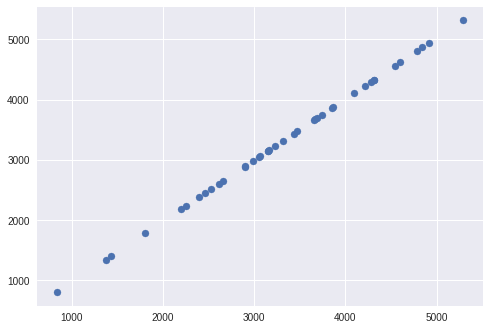

In [63]:
plt.scatter(linear_predicted, y_test)
plt.show()

In [64]:
linear_residuals = linear_predicted - y_test
linear_residuals_df = pd.DataFrame(linear_residuals)

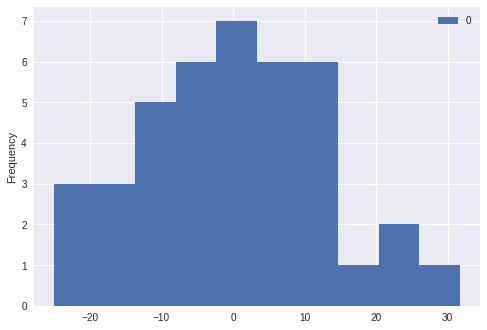

In [65]:
linear_residuals_df.plot(kind = 'hist')
plt.show()

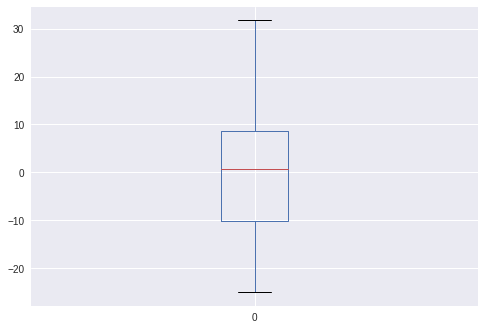

In [66]:
linear_residuals_df.plot(kind = 'box')
plt.show()

## Linear Regression Model - Ridge Regression

In [67]:
alphas = np.linspace(0.00001,1,1000)*0.5

In [68]:
lasso_model = linear_model.Lasso(max_iter=10000, normalize=True)
lasso_coeff = []

for a in alphas:
    lasso_model.set_params(alpha = a)
    lasso_model.fit(x_train_std, y_train_std)
    lasso_coeff.append(lasso_model.coef_)

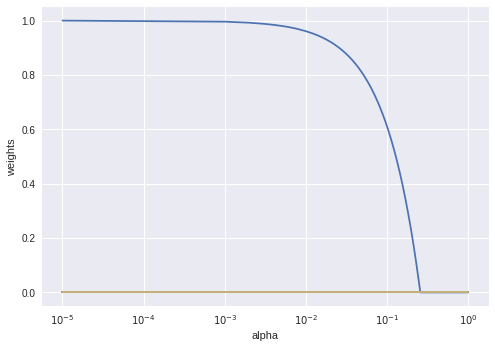

In [71]:
ax = plt.gca()
ax.plot(alphas*2, lasso_coeff)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

In [72]:
y_train_std = y_train_std.reshape(60,)
lassocv = linear_model.LassoCV(alphas = alphas, cv=10, max_iter=100000, normalize=True)
lassocv.fit(x_train_std, y_train_std)

LassoCV(alphas=array([  5.00000e-06,   5.05495e-04, ...,   4.99500e-01,   5.00000e-01]),
    copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=100000,
    n_alphas=100, n_jobs=1, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [73]:
lasso_model.set_params(alpha=lassocv.alpha_)
lasso_model.fit(x_train_std, y_train_std)

Lasso(alpha=5.0000000000000004e-06, copy_X=True, fit_intercept=True,
   max_iter=10000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [74]:
lasso_predicted = lasso_model.predict(x_test_std)
lasso_predicted = lasso_predicted.reshape(40,1)
lasso_predicted = (lasso_predicted * y_test.std()) + y_test.mean()

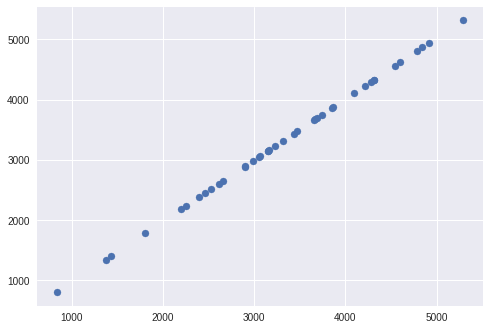

In [75]:
plt.scatter(lasso_predicted, y_test)
plt.show()

In [76]:
lasso_residuals = lasso_predicted - y_test
lasso_residuals_df = pd.DataFrame(lasso_residuals)

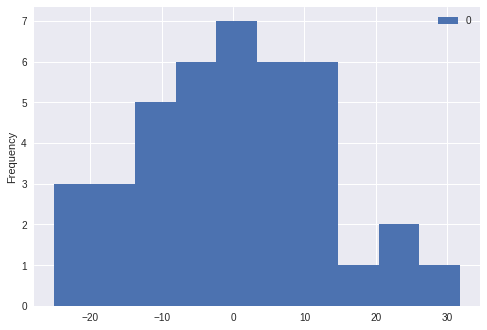

In [77]:
lasso_residuals_df.plot(kind = 'hist')
plt.show()

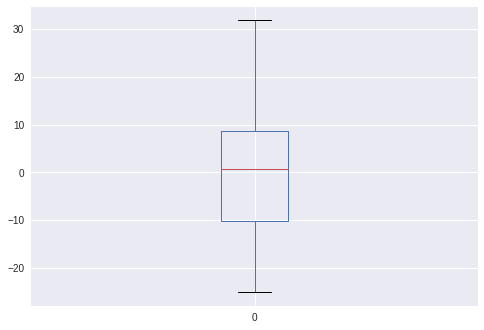

In [78]:
lasso_residuals_df.plot(kind = 'box')
plt.show()

## Linear Regression Model - Ridge Regression

In [84]:
alphas = np.linspace(0.0001,15,1000)*0.5

In [85]:
ridge_model = linear_model.Ridge(normalize = True)
ridge_coeff = []
for a in alphas:
    ridge_model.set_params(alpha = a)
    ridge_model.fit(x_train_std, y_train_std)
    ridge_coeff.append(ridge_model.coef_)

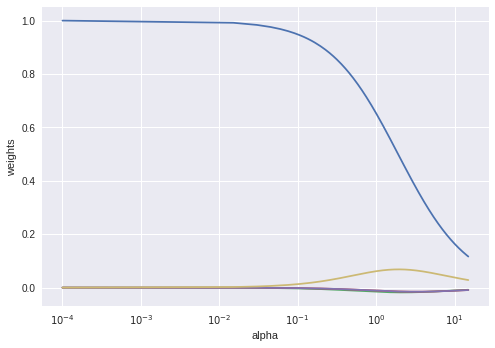

In [86]:
ax = plt.gca()
ax.plot(alphas*2, ridge_coeff)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

In [87]:
ridgecv = linear_model.RidgeCV(alphas = alphas, normalize=True)
ridgecv.fit(x_train_std, y_train_std)

RidgeCV(alphas=array([  5.00000e-05,   7.55746e-03, ...,   7.49249e+00,   7.50000e+00]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
    scoring=None, store_cv_values=False)

In [88]:
ridge_model.set_params(alpha = ridgecv.alpha_)
ridge_model.fit(x_train_std, y_train_std)

Ridge(alpha=5.0000000000000002e-05, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=True, random_state=None, solver='auto',
   tol=0.001)

In [89]:
ridge_predicted = ridge_model.predict(x_test_std)
ridge_predicted = ridge_predicted.reshape(40,1)
ridge_predicted = (ridge_predicted * y_test.std()) + y_test.mean()

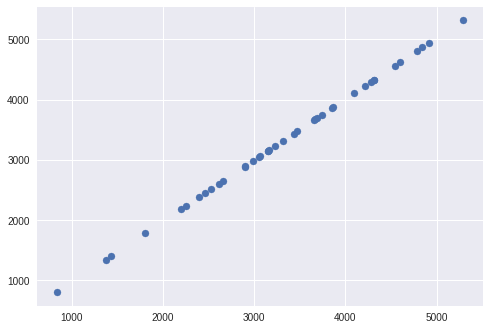

In [90]:
plt.scatter(ridge_predicted, y_test)
plt.show()

In [91]:
ridge_residuals = ridge_predicted - y_test
ridge_residuals_df = pd.DataFrame(ridge_residuals)

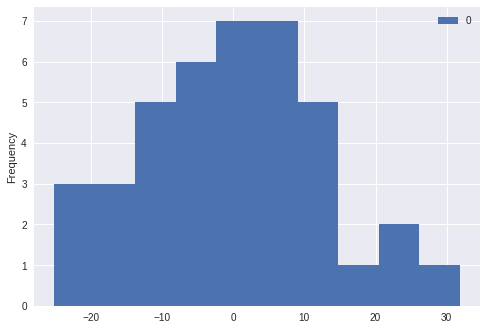

In [92]:
ridge_residuals_df.plot(kind = 'hist')
plt.show()

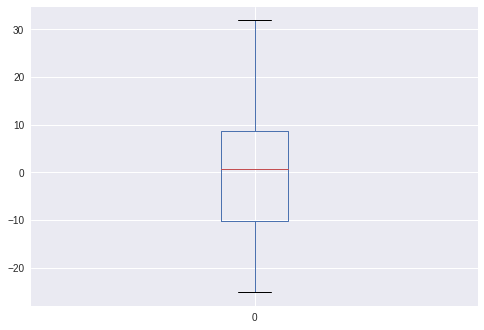

In [93]:
ridge_residuals_df.plot(kind = 'box')
plt.show()